Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [2]:
NAME = "Stephen Schaumann"
COLLABORATORS = "Simon Heming"

---

#  Einleitung
In dieser Aufgabe soll Ihr Verständnis von Sortieralgorithmen gestärkt werden. Stellen Sie sicher, dass sie das Archiv samt Test-Dateien heruntergeladen und in einen Unterordner `test_cases` extrahiert haben (Quelle: http://blog.quibb.org/2008/11/sort-optimization/). Öffnen Sie den Ordner und schauen Sie sich den Schema an, nachdem die Dateien benannt sind.




# Sortierverfahren implementieren (6⋅4 Pkt.)
Implementieren Sie folgende Sortieralgorithmen.

- Selectionsort
- Insertionsort
- Quicksort
- Bubblesort
- Mergesort
- Heapsort

Die Sortieralgorithmen sollen eine sortierte Kopie der ursprünglichen Liste zurück geben und das Original nicht verändern (damit das Verhalten kongruent zu `sorted()`) ist.


In [3]:
from copy import deepcopy

def selectionsort(data):
    N = len(data)
    sorted = deepcopy(data)
    for i in range(N):
        minimum = i
        for k in range(i + 1, N):
            if sorted[k] < sorted[minimum]:
                minimum = k
        sorted[i], sorted[minimum] = sorted[minimum], sorted[i]
    return sorted


def insertionsort(data):
    sorted = [data[0]]
    N = len(data)
    for i in range(1, N):
        j = i-1
        while(j >= 0 and data[i] < sorted[j]):
            j -= 1
        sorted.insert(j+1, data[i])
    return sorted        


def bubblesort(data):
    sorted = deepcopy(data)
    N = len(data)    
    for i in range(N):
        for j in range(N-i-1):
            if(sorted[j] > sorted[j+1]):
                sorted[j], sorted[j+1] = sorted[j+1], sorted[j]
    return sorted


def quicksort(data):
    def partition(data, l, r):
        '''Partitions data in the range from l to r, returning position of pivot'''
        i, j = l+1, r
        p_init = l
        pivot = data[p_init]
        
        while(True):
            while(i < r and data[i] <= pivot):
                i += 1
            while(j > l and data[j] >= pivot):
                j -= 1
            if(i >= j):
                break
            data[i], data[j] = data[j], data[i]
            
        #p = l
        #while(p <= r):
        #    if(pivot < data[p]):
        #        break
        #    p += 1
        #p -= 1
        p = j
        data[p], data[p_init] = data[p_init], data[p]
        return p
    
    def quicksort_rec(data, l, r):
        if(r > l):
            i = partition(data, l, r)
            quicksort_rec(data, l, i-1)
            quicksort_rec(data, i+1, r)
        
    sorted = list(data)
    quicksort_rec(sorted, 0, len(sorted)-1)
    return sorted


def heapsort(data):
    def parent(i):
        return (i-1)//2
    def left_child(i):
        return 2*i+1
    def right_child(i):
        return 2*i+2
    
    def sink(heap, i):
        node = i
        while(left_child(node) < len(heap)):
            swap = node
            if(heap[left_child(node)] > heap[node]):
                swap = left_child(node)
            if(right_child(node) < len(heap)):
                if(heap[right_child(node)] > heap[swap]):
                    swap = right_child(node)
            if(swap == node):
                return
            else:
                heap[swap], heap[node] = heap[node], heap[swap]
                node = swap
    
    N = len(data)
    heap = deepcopy(data)
    
    #heapify
    start = parent(N-1)
    while(start >= 0):
        sink(heap, start)
        start -= 1
        
    #return sorted list
    sorted = []
    for i in range(N-1):
        sorted.insert(0, heap[0])
        heap[0] = heap.pop()
        sink(heap, 0)
    sorted.insert(0, heap[0])
        
    return sorted

    
def mergesort(data):
    N = len(data)
    
    if(N <= 1):
        return data
    
    def merge(x, y):
        merged = []
        while(len(x) != 0 and len(y) != 0):
            if(x[0] < y[0]):
                merged.append(x.pop(0))
            else:
                merged.append(y.pop(0))
        merged += x + y
        return merged
    
    left  = mergesort(data[:N//2])
    right = mergesort(data[N//2:])
    result = merge(left, right)
    return result


In [4]:
import random

SAMPLE_LIST = random.sample(range(100), 30)

def test_algorithm(algorithm):
    sample_list = SAMPLE_LIST[:]
    assert algorithm(sample_list) == sorted(sample_list), "{} did not sort the list".format(algorithm.__name__)
    assert sample_list == SAMPLE_LIST, "{} altered the original".format(algorithm.__name__)

In [5]:
test_algorithm(selectionsort)

In [6]:
test_algorithm(insertionsort)

In [7]:
test_algorithm(bubblesort)

In [8]:
test_algorithm(quicksort)

In [9]:
test_algorithm(heapsort)

In [10]:
test_algorithm(mergesort)

# Einlesen von Dateien (4 Pkt.)
Schreiben sie eine Funktion `load_test_cases(path)`, die zu den zur Verfügung gestellten Testfällen jeweils die Datei mit 10e3 Einträgen lädt.

In [11]:
from glob import glob


TEST_CASE_PATH = 'D:\\Dropbox\\Studium\\IAD\\exercises\\exercise3\\test_files'
#TEST_CASE_PATH = "/home/heming/Downloads/test_files/"

def load_test_cases(path):
    data_dir = glob(path + '\\*')
    find = '.10000.txt'
    data = {}
    for file in data_dir:
        if find in file:
            file_name = file.split('\\')[-1]
            key_name = '.'.join(file_name.split('.')[0:-2])
            txt_data = []
            with open(file) as f:
                for line in f:
                    txt_data.append(int(line))
            data[key_name] = txt_data
    return data

In [12]:
import unittest

unittest_test_case = unittest.TestCase('__init__')

loaded_test_cases = load_test_cases(TEST_CASE_PATH)
available_test_cases = ['1245.repeat', 'end.0', 'identical', 'med.3.killer', 'rand.dups', 'rand.no.dups', 'rand.steps', 
                        'rev.ends', 'rev.partial', 'rev.saw', 'reverse', 'seq.0.is.1000', 'seq.partial', 'seq.saw', 'sequential']

unittest_test_case.assertCountEqual(loaded_test_cases.keys(), available_test_cases)

for key, value in loaded_test_cases.items():
    assert len(value) == 10e3, "Number of testcases mismatch for {}".format(key)

# Sortierverfahren testen (12 Pkt.)
 Vergleichen Sie die Sortierverfahren untereinander und mit der Python Funktion `sorted()`
 - Benutzen sie `result = %timeit -n 100 -r 3 -o` um die Ausführung zu messen und das Ergebnis in einer Variablen speichern zu können. Auf das beste Ergebnis können Sie mit `result.best` zugreifen.
 - Gruppieren Sie die Ergebnisse nach Testfall.
 - Testen sie folgende „Splices“ Ihres Testdatensatzes: `x_values = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]`
 - Stellen sie die Ergebnisse mittels Tabelle und Graphen mit Titel und Achsenbeschriftung dar (Matplotlib).
 - Bewerten Sie das Ergebnis

In [ ]:
# for quicksort
import sys
import numpy as np
sys.setrecursionlimit(20000)

data = load_test_cases(TEST_CASE_PATH)
algorithmen = [selectionsort, insertionsort, bubblesort, quicksort, heapsort, mergesort]
ergebnisse = {}

x_values = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]

for case in loaded_test_cases:
    print("Starting ", case)
    case_dict = {}
    for algorithmus in algorithmen:
        #print(str(algorithmus))
        times = np.empty(len(x_values))
        for i,x in enumerate(x_values):
            working_data = data[case][:x]
            with fuckit:
                result = %timeit -n 10 -r 3 -o algorithmus(working_data)
            times[i] = result.best
        case_dict[algorithmus] = times
    np.save("case_dict_"+str(case)+".npy", case_dict)
    ergebnisse[case] = case_dict
    
            
np.save("ergebnisse.npy", ergebnisse)

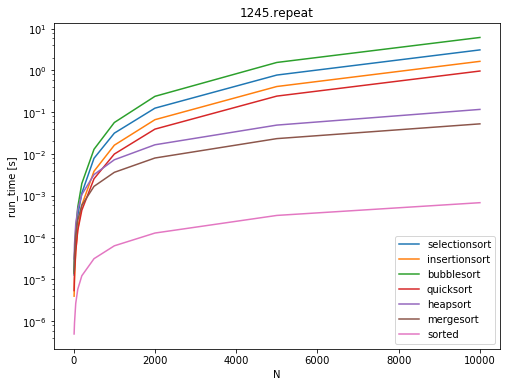

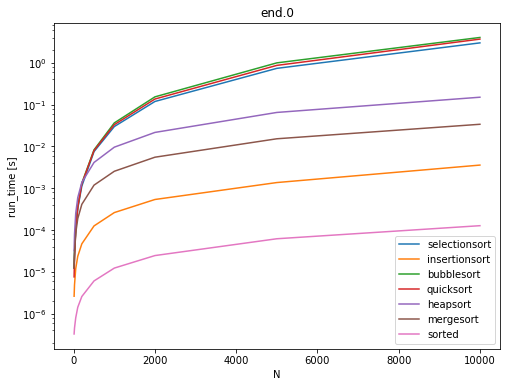

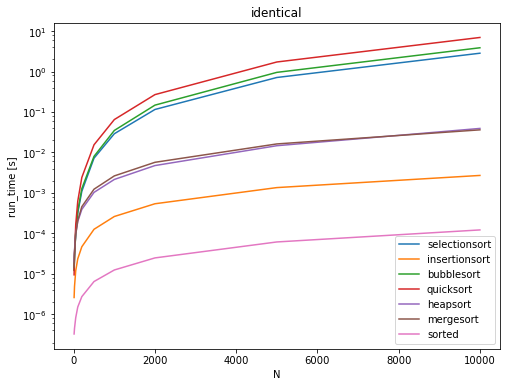

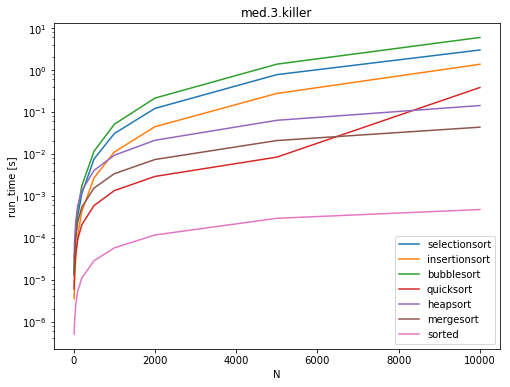

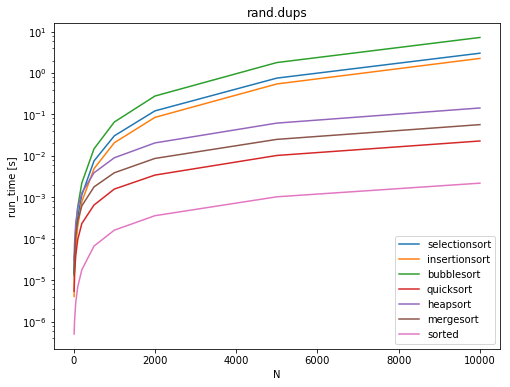

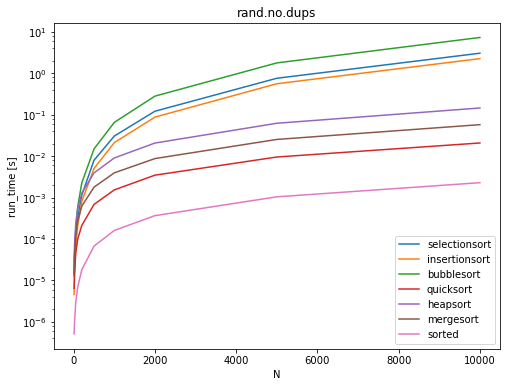

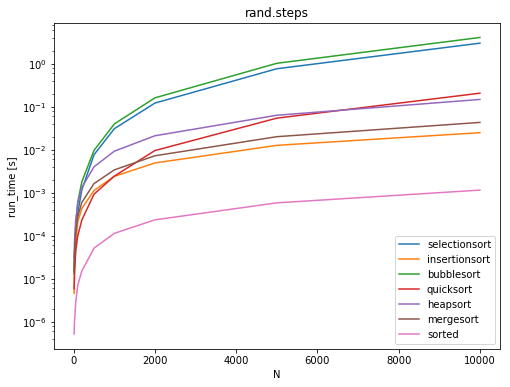

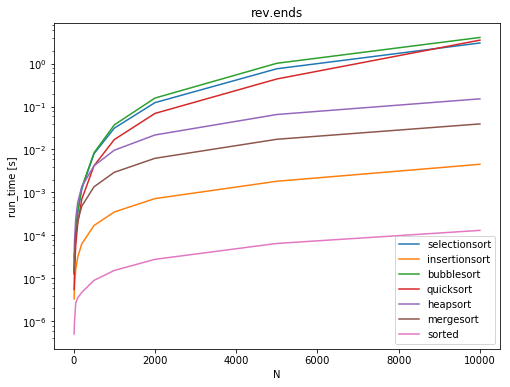

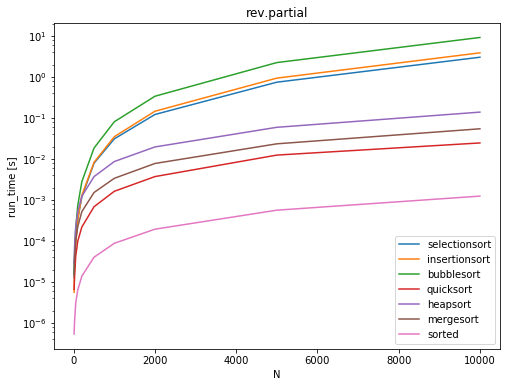

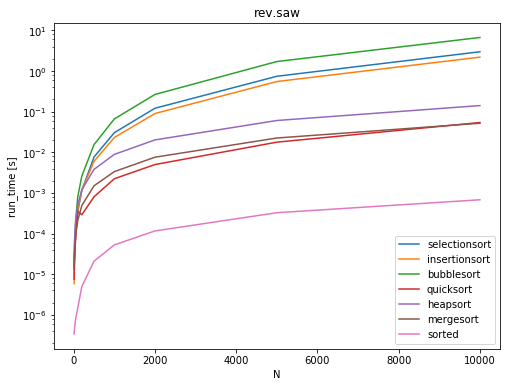

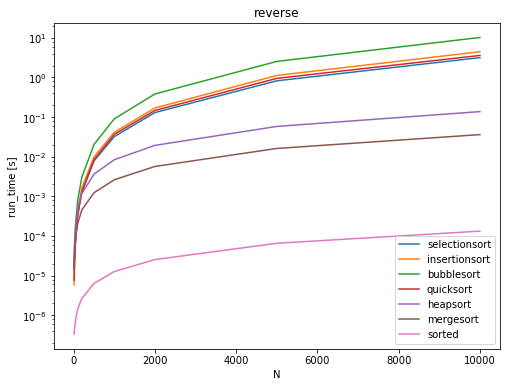

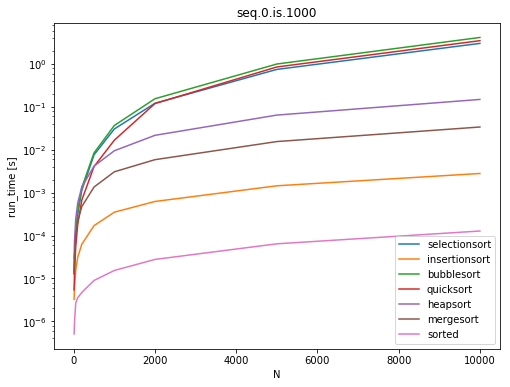

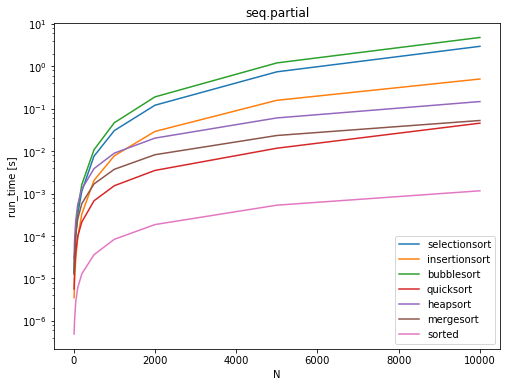

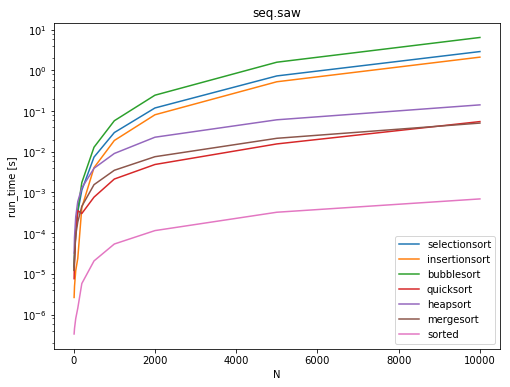

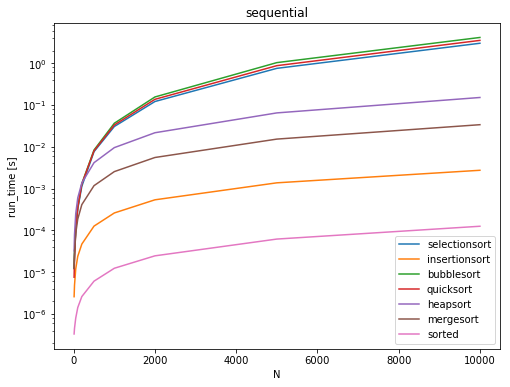

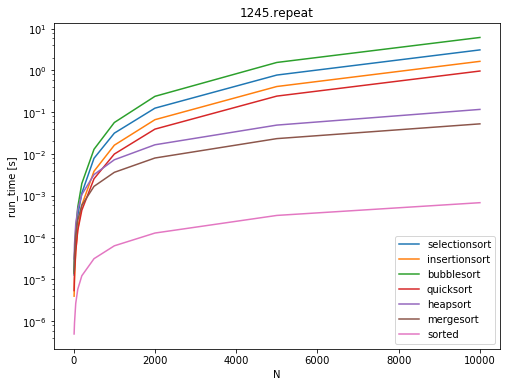

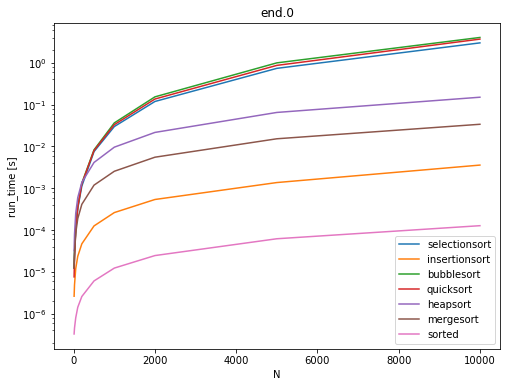

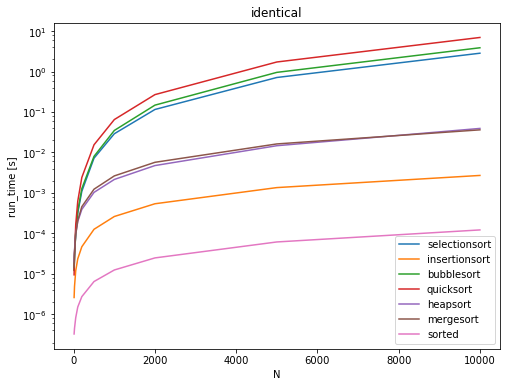

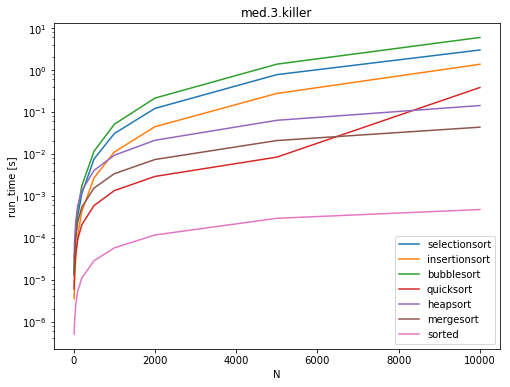

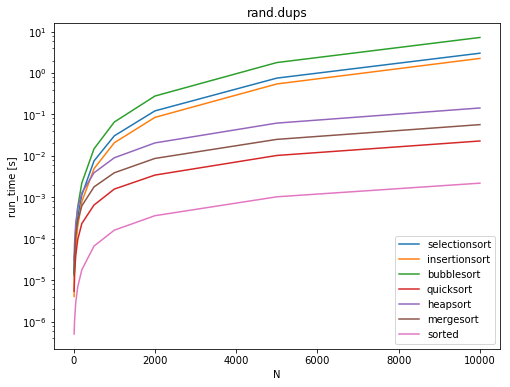

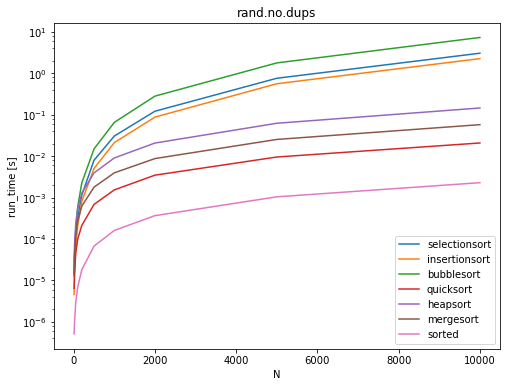

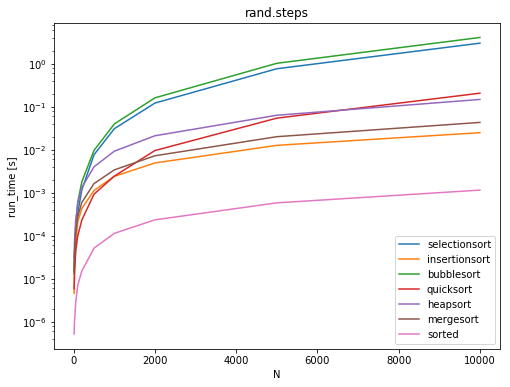

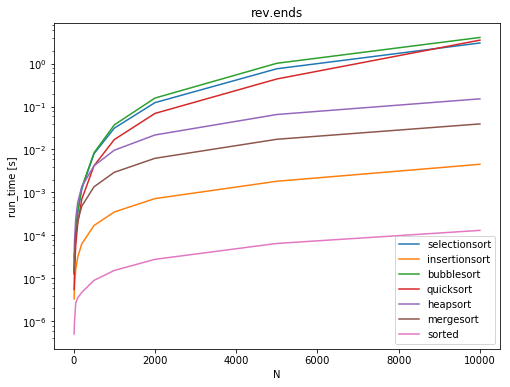

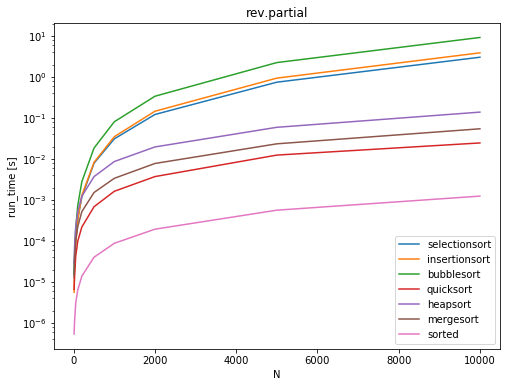

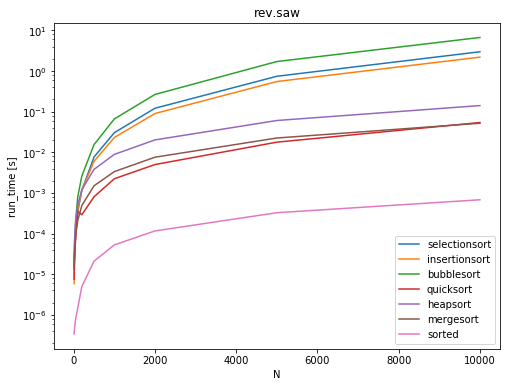

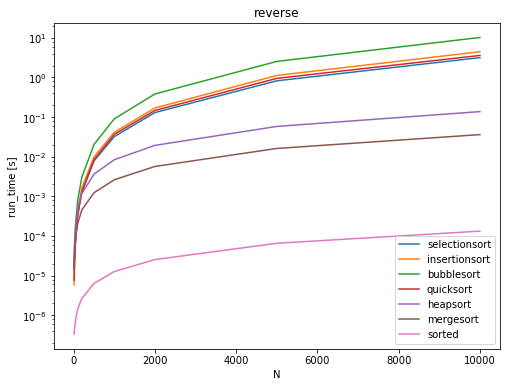

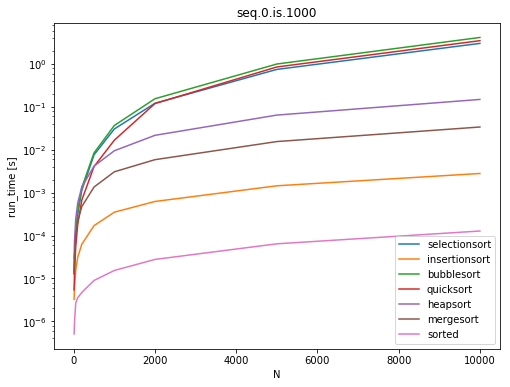

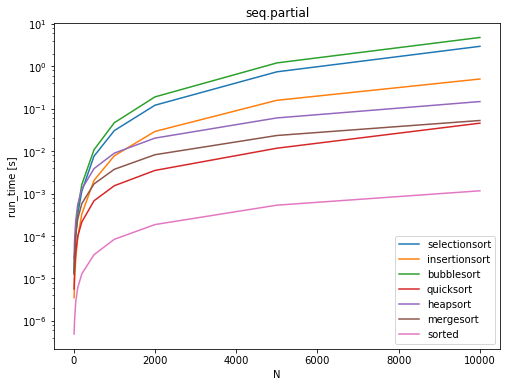

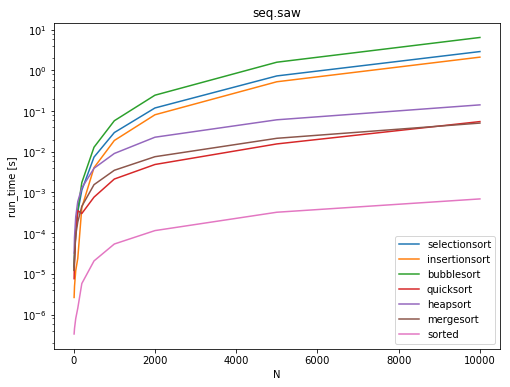

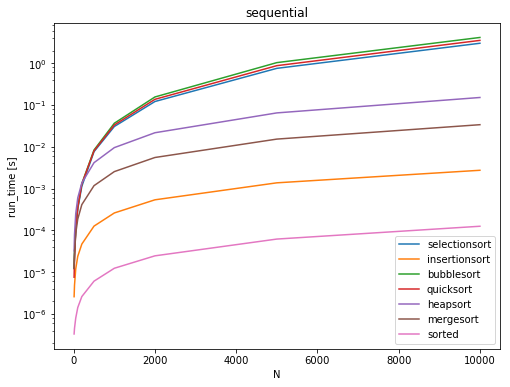

In [15]:
import matplotlib.pyplot as plt
import numpy as np
x_values = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]

for case in loaded_test_cases:
    fig = plt.figure(figsize=(8,6))
    daten = np.load("case_dict_" + str(case) + ".npy").item()
    for key, value in daten.items():
        lab = str(key).split(' ')[1] if str(key).split(' ')[1] != 'function' else 'sorted'
        plt.plot(x_values, value, label=lab)
    plt.title(str(case))
    plt.xlabel('N')
    plt.ylabel('run_time [s]')
    plt.yscale('log')
    plt.legend()
    plt.show()
    #plt.savefig(case+'.png')
    plt.close

Wie wir sehen hängt die Effizienz unserer Algorithmen stark davon ab, wie die zu sortierende Liste aussieht. Generell sind selectionsort, insertionsort und (besonders) bubblesort langsamer als die anderen, in manchen Fällen ist das aber nicht der Fall (siehe z.B. das letzte Bild. insertionsort ist am schnellsten von unseren Algorithmen).<br>
In jedem Fall ist aber die eingebaute Funktion `sorted()` deutlich schneller als alles von uns geschriebene, ungefähr 1-2 Größenordnungen. Diese robuste Effizienz deutet darauf hin, dass diese Funktion womöglich dynamisch ist und sich den Daten anpasst, da sie bei all diesen Fällen nie so einen Schwachpunkt hatte, dass eine unserer Funktionen sie schlagen konnte.